# imports

In [1]:
import numpy as np
import math
import pandas as pd
pd.set_option("display.max_rows", 1000, "display.max_columns", 1000)
import matplotlib.pyplot as plt
import os
from scipy import interpolate
import sys
#sys.path.insert(0, '/Home/siv30/wad005/useful_py_functions') #UiB
sys.path.insert(0, "/Users/andreas/proggis/useful_py_func/") #Mac
import matplotlib_custom_style_and_macros as pltmacro #Importin the py file from dir
%run read_matlab_file.ipynb
%run convert_erg.ipynb

read_matlab_file.ipynb loaded
read_matlab_file.ipynb loaded
convert_erg.ipynb loaded


# TODO

-Make the correct estimation of safety time from keV array

-BUG: Should sort the df first by adr, and then tus. THEN implement the safety time criteria for the same detector! dumbass...

-Another criteria for safety time: check must be for the same adress (detector)


# Notes
Pandas syntax:

-iloc retrives the chronological index 

-loc retrives the label index 

In [2]:
#path = "/Home/siv30/wad005/master/GRB/safety_time/safety_time.csv" #UiB
path = "/Users/andreas/phys/master/GRB/safety_time/safety_time.csv" #Mac

# Satety time DF

In [3]:
st_df = pd.read_csv(path)
st_df = st_df.rename(columns={"pmt":"det"})
st_df.head(50)

,adr,dau,det,E0_kev,minimum_dt_us
0,1,1,1,400,0
1,1,1,1,500,1
2,1,1,1,1000,3
3,1,1,1,2500,11
4,1,1,1,3000,13
5,1,1,1,3500,15
6,1,1,1,4000,15
7,1,1,1,4500,15
8,1,1,1,5000,19
9,1,1,1,6000,19


# cutting df

In [4]:
#Cutting indecies: there is always 23 rows for each detector
for i in np.arange(0,275,23):
    print(i-1)

-1
22
45
68
91
114
137
160
183
206
229
252


In [5]:
adr_1_df = st_df.truncate(after=22)
adr_2_df = st_df.truncate(before=23,after=45)
adr_3_df = st_df.truncate(before=46,after=68)
adr_4_df = st_df.truncate(before=69,after=91)
adr_5_df = st_df.truncate(before=92,after=114)
adr_6_df = st_df.truncate(before=115,after=137)
adr_7_df = st_df.truncate(before=138,after=160)
adr_8_df = st_df.truncate(before=161,after=183)
adr_9_df = st_df.truncate(before=184,after=206)
adr_10_df = st_df.truncate(before=207,after=229)
adr_11_df = st_df.truncate(before=230,after=252)
adr_12_df = st_df.truncate(before=253)

adr_df_list = [adr_1_df,adr_2_df, adr_3_df,adr_4_df,  adr_5_df,adr_6_df,  adr_7_df,adr_8_df,  adr_9_df,adr_10_df,  adr_11_df,adr_12_df] #validated ok!

# Interpolation for all the detectors

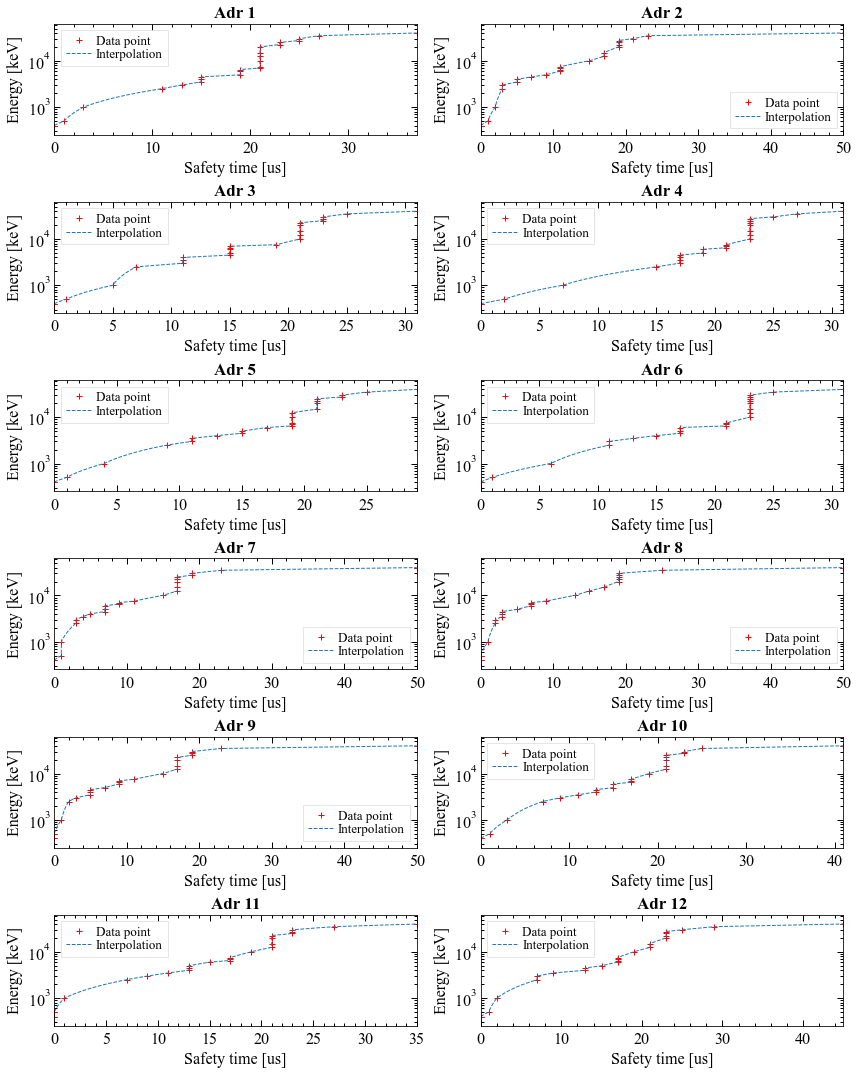

In [6]:
#Creating 6x2 subplots for all the safety time estimates for all the detectors
fig, (axs1,axs2,axs3,axs4,axs5,axs6) = plt.subplots(6,2,figsize=(12,15))
axs_list = [axs1,axs2,axs3,axs4,axs5,axs6]
for i,axs in enumerate(axs_list):
    first_idx = i*2
    sec_idx = i*2 +1
    
    dt_0 = adr_df_list[first_idx]["minimum_dt_us"].values
    keV_0 = adr_df_list[first_idx]["E0_kev"].values
    f_0 = interpolate.interp1d(dt_0, keV_0) #fill_value="extrapolate"  --> specifying what happens if one specifies an input value that is out of bounds used for general function
    dt_0_new = np.arange(min(dt_0),max(dt_0),0.01)
    keV_0_new = f_0(dt_0_new)

    axs[0].plot(dt_0, keV_0,'r+',label="Data point")
    axs[0].plot(dt_0_new, keV_0_new, '--',label="Interpolation")
    axs[0].set_yscale('log')
    axs[0].set_title("Adr {}".format(str(first_idx + 1)), fontweight='bold')
    axs[0].set_xlabel('Safety time [us]')
    axs[0].set_ylabel('Energy [keV]')
    axs[0].legend()
    
    dt_1 = adr_df_list[sec_idx]["minimum_dt_us"].values
    keV_1 = adr_df_list[sec_idx]["E0_kev"].values
    f_1 = interpolate.interp1d(dt_1, keV_1) #fill_value="extrapolate"  --> specifying what happens if one specifies an input value that is out of bounds used for general function
    dt_1_new = np.arange(min(dt_1),max(dt_1),0.01)
    keV_1_new = f_1(dt_1_new)
    
    axs[1].plot(dt_1, keV_1, 'r+',label="Data point")
    axs[1].plot(dt_1_new, keV_1_new, '--',label="Interpolation")
    axs[1].set_yscale('log')
    axs[1].set_title("Adr {}".format(str(sec_idx + 1)), fontweight='bold')
    axs[1].set_xlabel('Safety time [us]')
    axs[1].set_ylabel('Energy [keV]')
    axs[1].legend()
    
fig.tight_layout()
plt.show()

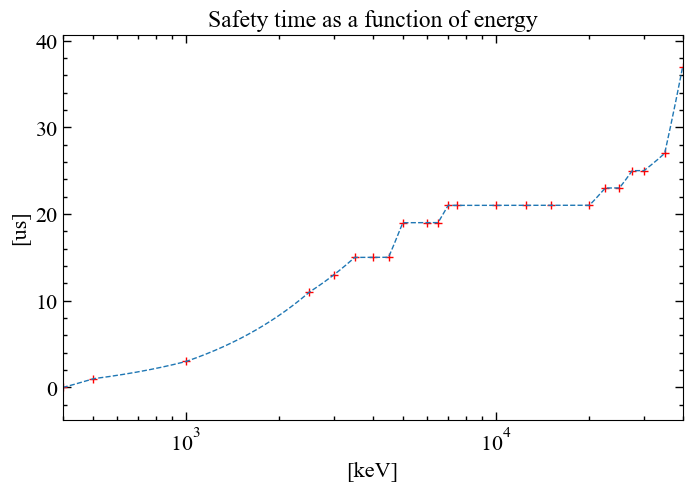

In [7]:
dt_arr = adr_df_list[0]["minimum_dt_us"].values
keV_arr = adr_df_list[0]["E0_kev"].values
f = interpolate.interp1d(keV_arr,dt_arr,fill_value="extrapolate",bounds_error=False) #fill_value="extrapolate"  --> specifying what happens if one specifies an input value that is out of bounds used for general function
keV_new = np.arange(min(keV_arr),max(keV_arr),0.01)
dt_new = f(keV_new)
plt.plot(keV_arr,dt_arr, 'r+', keV_new, dt_new,'--') #, keV_new,dt_new,'-'
plt.xscale('log')
plt.xlabel('[keV]')
plt.ylabel("[us]")
plt.title("Safety time as a function of energy")
plt.show()

# Getter functions for estimating safety time

In [8]:
def est_st(adr=None,keV=None):
    """Estimating safetytime for a given adr to detector
    and a given keV from energy channel"""
    if keV<=400:
        return 0
    else:
        dt_arr = adr_df_list[adr-1]["minimum_dt_us"].values
        keV_arr = adr_df_list[adr-1]["E0_kev"].values
        f = interpolate.interp1d(keV_arr,dt_arr,fill_value="extrapolate",bounds_error=False) #fill_value="extrapolate"  --> specifying what happens if one specifies an input value that is out of bounds used for general function
        sf = f(keV)
        return float(sf)

In [9]:
def get_st(df):
    st_temp = []
    adr_arr = df["adr"].to_numpy()
    keV_arr = df["keV"].to_numpy()
    
    for i,keV in enumerate(keV_arr):
         st_temp.append(est_st(adr_arr[i],keV))
    return st_temp

In [10]:
def get_dt(df):
    dt_temp = []
    adr_arr = df["adr"].to_numpy()
    tus_arr = df["tus"].to_numpy()
    
    for i,tus in enumerate(tus_arr):
        if i == 0:
            dt_temp.append(None) #at the start of the array. No dt to next because its the last one
        elif adr_arr[i] != adr_arr[i-1]:
            dt_temp.append(None) #No prev trigger at border
        else:
            dt_temp.append(np.abs(tus-tus_arr[i-1])) #appending the dt 
    return dt_temp

In [11]:
def get_flag(df):
    """Improvement!
    Have located where the st criteria first have been set.
    But now: flag the following events that have triggered BEFORE the safety time have lapsed.
    
    ITS THE TRIGGERS AFTER A HIGH ENERGY READING THAT NEEDS TO BE FLAGGED
    
    FUNCTION SHOULD ALSO FLAG FAST EVENTS. automatically flag them. if typ=1 >>flag elif dt<st >>flag
    
    """
    st_arr = df["st"].to_numpy()
    dt_arr = df["dt"].to_numpy()

    flag = []
    i = 0
    while i < len(st_arr):
        if dt_arr[i] >= st_arr[i-1]:
            flag.append(False)
            i+=1
        elif dt_arr[i] <= st_arr[i-1]:
            st = st_arr[i-1]
            diff = dt_arr[i]
            flags = 0
            i += 1
            while diff < st:
                diff += dt_arr[i]
                flags += 1
                i +=1
            flag.extend(flags*[True])
            i -= 1     
        else:
            flag.append(False)
            i += 1
            
    if len(flag) == len(st_arr):
        return flag
    else:
        print("the shape of the flag array is not correct")
        

In [12]:
def main_st(grb_id):
    if len(trig_dict_HED[grb_id])>1:
        return print("long grb, handle later")
    else:
        tus, erg, typ, adr, dau, det, date,T0 = read_matlab_file_with_BGO_data(trig_dict_HED[grb_id][0])
        keV,cal_abc = convert_erg(erg,T0)
        df = create_df(tus,erg,typ,adr,dau,det,keV,cal_abc)
        df = df.sort_values(by=['adr','tus']) #important to sort first by the adr then tus --> Handling the triggers in each detector seperate
        
        #Creating columns for st, dt and flag
        st_list = get_st(df)
        df["st"] = st_list
        
        dt_list = get_dt(df)
        df["dt"] = dt_list
        
        flag = get_flag(df) #should also flag fast events!
        df["flag"] = flag
        
        return df

In [13]:
df = main_st("GRB200415")
print(df.shape)
df.head()

(14494, 11)


,tus,erg,typ,adr,dau,det,keV,cal_abc,st,dt,flag
2,-970399.888889,54,0,1,1,1,534.272300,"0.005245, 8.4154, 64.54628",1.137089,NaN,False
3,-969958.055556,216,0,1,1,1,2126.983400,"0.005245, 8.4154, 64.54628",9.010578,441.833333,False
4,-969650.083333,197,0,1,1,1,1925.933285,"0.005245, 8.4154, 64.54628",7.938311,307.972222,False
5,-969416.277778,32,0,1,1,1,339.209960,"0.005245, 8.4154, 64.54628",0.000000,233.805556,False
14,-967905.888889,1727,0,1,1,1,30241.306685,"0.005245, 8.4154, 64.54628",25.096523,1510.388889,False


# Debugg

In [14]:
#df_A = pd.read_csv("/Home/siv30/wad005/master/GRB/safety_time/HED_GRB200415_inc_valley_ST.csv",sep=",") #UIB
df_A = pd.read_csv("/Users/andreas/phys/master//GRB/safety_time/new_safety_time.csv",sep=",")
df_A = df_A.rename(columns={"kev":"keV"}) 
print(df_A.shape)
df_A.head()

(14610, 9)


,tus,erg,typ,adr,dau,det,keV,cal_abc,remove_VD
0,-998821.888889,54,0,1,1,1,534.2723,"0.005245, 8.415400, 64.546280",False
1,-998380.055556,216,0,1,1,1,2126.9834,"0.005245, 8.415400, 64.546280",False
2,-998072.083333,197,0,1,1,1,1925.9333,"0.005245, 8.415400, 64.546280",False
3,-997838.277778,32,0,1,1,1,339.2100,"0.005245, 8.415400, 64.546280",False
4,-996327.888889,1727,0,1,1,1,30241.3067,"0.005245, 8.415400, 64.546280",False


In [15]:
#df_A = pd.read_csv("/Home/siv30/wad005/master/GRB/safety_time/HED_GRB200415_inc_valley_ST.csv",sep=",") #UIB
df_A = pd.read_csv("/Users/andreas/phys/master//GRB/safety_time/new_safety_time.csv",sep=",")
df_A = df_A.rename(columns={"kev":"keV"}) 
df_A = df_A.sort_values(by=['adr','tus'])
print(df_A.shape)

st_list = get_st(df_A)
df_A["st"] = st_list
dt_list = get_dt(df_A)
df_A["dt"] = dt_list
flag_list = get_flag(df_A) #should also flag fast events!
df_A["flag"] = flag_list

#df_A = df_A.iloc[3768:3778]
df_A = df_A.drop(columns=["cal_abc"])
#df_A = df_A.set_index(np.arange(0,len(df_A["st"])))
df_A

(14610, 9)


,tus,erg,typ,adr,dau,det,keV,remove_VD,st,dt,flag
0,-9.988219e+05,54,0,1,1,1,534.2723,False,1.137089,NaN,False
1,-9.983801e+05,216,0,1,1,1,2126.9834,False,9.010578,441.833333,False
2,-9.980721e+05,197,0,1,1,1,1925.9333,False,7.938311,307.972222,False
3,-9.978383e+05,32,0,1,1,1,339.2100,False,0.000000,233.805556,False
4,-9.963279e+05,1727,0,1,1,1,30241.3067,False,25.096523,1510.388889,False
...,...,...,...,...,...,...,...,...,...,...,...
14605,9.910878e+05,40,0,12,4,3,534.0089,False,1.068018,7590.805556,False
14606,9.917378e+05,127,0,12,4,3,1689.3675,False,4.297892,650.000000,False
14607,9.971696e+05,49,0,12,4,3,651.9479,False,1.303896,5431.805556,False
14608,9.979444e+05,1833,0,12,4,3,31233.5684,False,25.986855,774.861111,False


In [16]:
VD = np.nonzero(df_A["remove_VD"].to_numpy())[0]
len(VD)

301

In [17]:
f = np.nonzero(df_A["flag"].to_numpy())[0]
len(f)

301

In [18]:
np.all(VD==f)

True